In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ta.trend import MACD
from ta.momentum import RSIIndicator
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle, os


In [2]:
df = pd.read_csv('../data/tatamotors.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].apply(pd.to_numeric, errors='coerce')


In [3]:
df['RSI'] = RSIIndicator(close=df['Close']).rsi()
macd = MACD(close=df['Close'])
df['MACD'] = macd.macd()
df['MACD_Signal'] = macd.macd_signal()
df['SMA7'] = df['Close'].rolling(window=7).mean()
df['SMA21'] = df['Close'].rolling(window=21).mean()
df.dropna(inplace=True)


In [4]:
features = ['Open', 'High', 'Low', 'Volume', 'RSI', 'MACD', 'MACD_Signal', 'SMA7', 'SMA21']
X = df[features]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [5]:
model = RandomForestRegressor(n_estimators=300, max_depth=12, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=12, n_estimators=300, random_state=42)

In [6]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 29.96
RMSE: 40.15
R² Score: -0.03


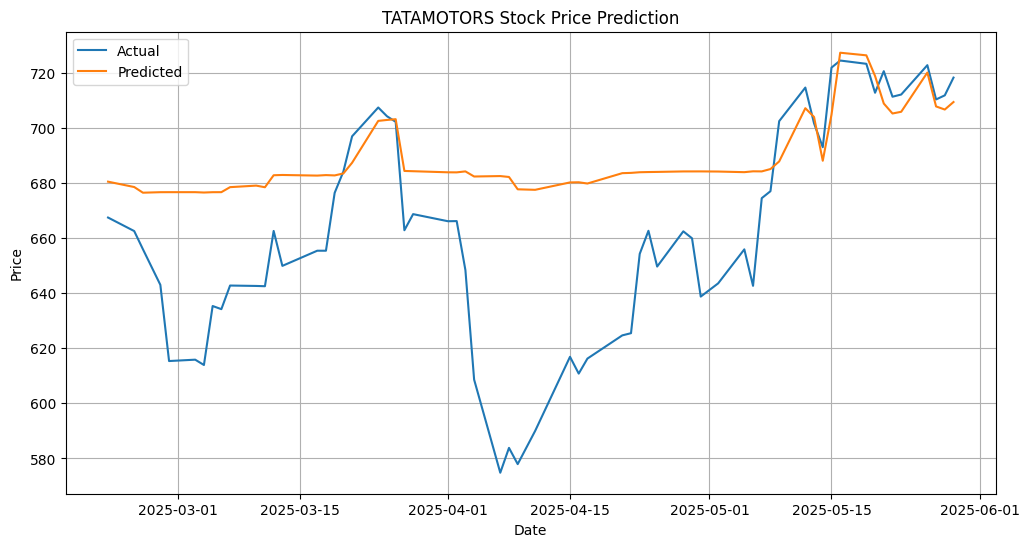

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'].iloc[-len(y_test):], y_test, label='Actual')
plt.plot(df['Date'].iloc[-len(y_test):], y_pred, label='Predicted')
plt.title("TATAMOTORS Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()
plt.legend()
plt.show()


In [8]:
model_name = 'tatamotors' 
os.makedirs('../models', exist_ok=True)
with open(f'../models/{model_name}.pkl', 'wb') as f:
    pickle.dump(model, f)

print(f"✅ Model saved as ../models/{model_name}.pkl")


✅ Model saved as ../models/tatamotors.pkl
